<a href="https://colab.research.google.com/github/dayeondev/Kaggle/blob/master/Titanic_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###################
###################
#### 데이터 분석 ####
###################
###################

In [ ]:
# 판다스 라이브러리와 타이타닉 데이터 불러오기
import pandas as pd

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
 
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 정보 확인

train.info()


# PassengerId : 승객 번호

# Survived : 생존여부(1: 생존, 0 : 사망)

# Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)

# Name : 승객 이름

# Sex : 승객 성별

# Age : 승객 나이 

# SibSp : 동반한 형제자매, 배우자 수

# Patch : 동반한 부모, 자식 수

# Ticket : 티켓의 고유 넘버

# Fare 티켓의 요금

# Cabin : 객실 번호

# Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
# 결측치(비어있는 값) 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # seaborn 기본지정

In [ ]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df=pd.DataFrame([survived, dead])
  df.index = ['Survived', 'Dead']
  df.plot(kind='bar', stacked=True, figsize=(10, 5))

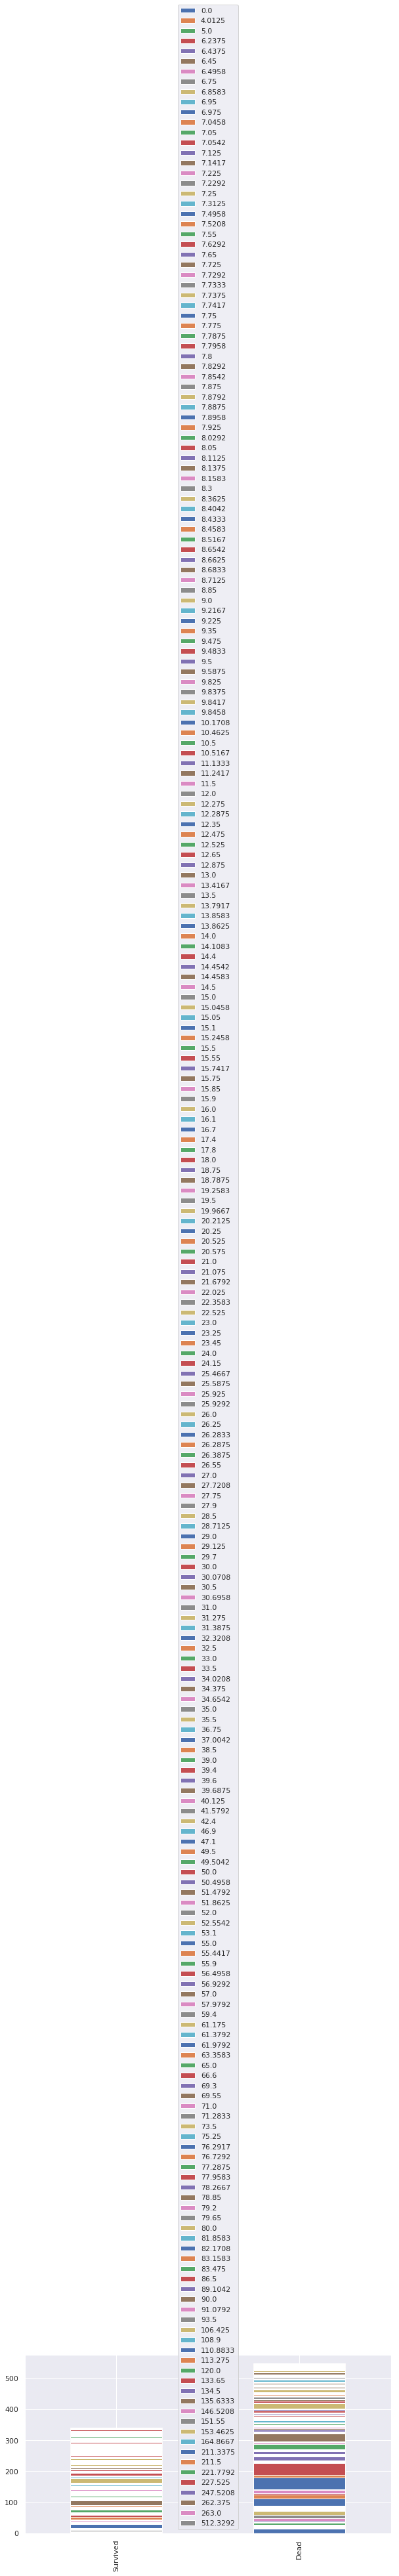

In [ ]:
bar_chart('Fare')

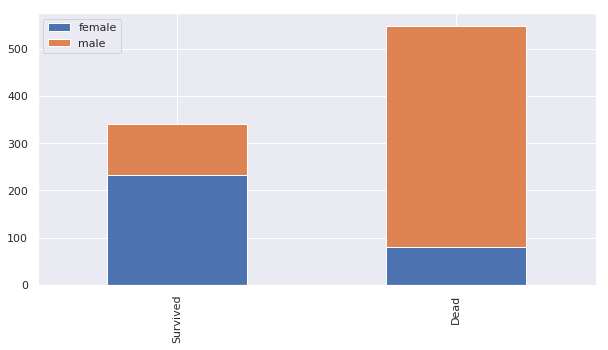

In [ ]:
bar_chart('Sex') # 성별

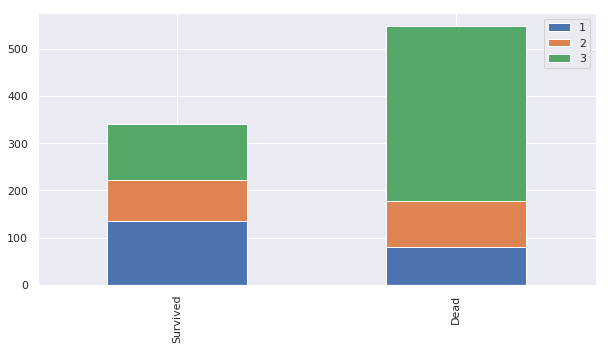

In [ ]:
bar_chart('Pclass') # 승선권

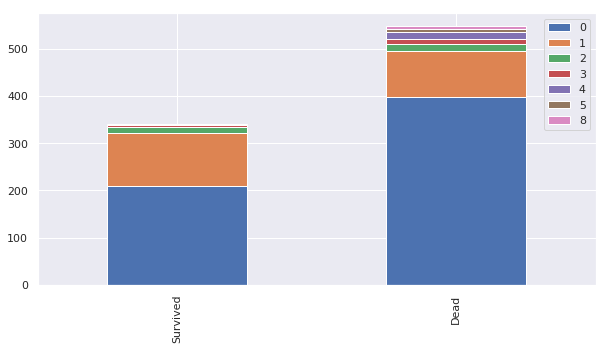

In [ ]:
bar_chart('SibSp') # 형재 자매 배우자 수

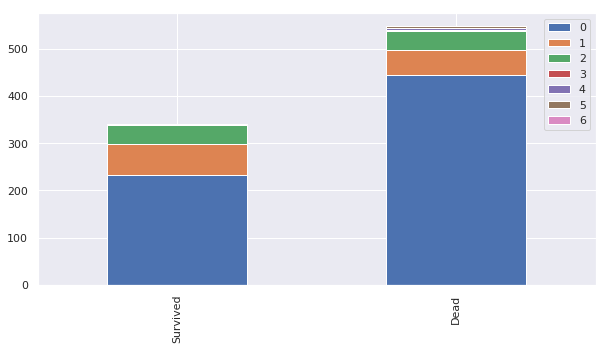

In [ ]:
bar_chart('Parch') # 부모와 자녀 수

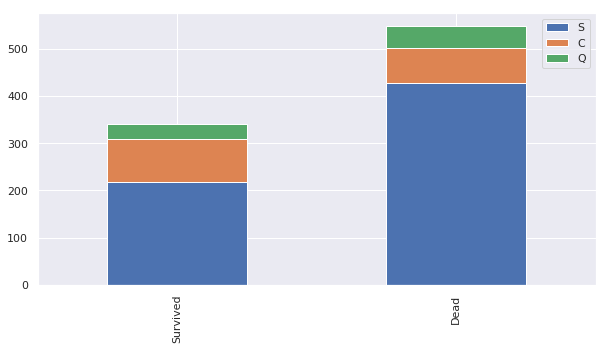

In [ ]:
bar_chart('Embarked') # 승선한 항구

In [ ]:
####################
####################
#### 데이터 전처리 ####
####################
####################

In [ ]:
# 가공할 데이터 확인
train.describe(include="all")

# 1. Age의 약 20프의 데이터가 Null로 되어있다.
# 2. Cabin의 대부분 값은 Null이다.
# 3. Name, Sex, Ticket, Cabin, Embarked는 숫자가 아닌 문자 값이다.
#  - 연관성 없는 데이터를 삭제하거나 숫자로 변경(머신러닝은 숫자를 인식)

# 1. Cabin과 Ticket 두 값은 삭제한다.(값이 비어있고 연관성이 없다는 판단하에)
# 2. Embarked, Name, Sex 값은 숫자로 변경할 것 입니다.
# 3. Age의 Null 데이터를 채워 넣을 것입니다.
# 4. Age의 값의 범위를 줄일 것입니다.(큰 범위는 머신러닝 분석시 좋지 않습니다.)
# 5. Fare의 값도 범위를 줄일 것입니다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hawksford, Mr. Walter James",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
#########################
# 1. Cabin, Ticket 삭제 #
#########################

In [ ]:
# 두번실행시 오류남(한번하고 아래 네줄 주석처리)
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
#########################
# 2. Embarked 값 가공하기 #
#########################

In [ ]:
southampton = train[train["Embarked"] == "S"].shape[0]
print("S: ", southampton)
cherbourg = train[train["Embarked"] == "C"].shape[0]
print("C: ", cherbourg)
queenstown = train[train["Embarked"] == "Q"].shape[0]
print("Q: ", queenstown)

S:  644
C:  168
Q:  77


In [ ]:
# 위의 결과를 통해 대부분의 값이 S라는 것을 알 수 있다.
# 나머지 빈 값을 S로 바꿔주자
train = train.fillna({"Embarked": "S"})

In [ ]:
southampton = train[train["Embarked"] == "S"].shape[0]
print("S: ", southampton)
cherbourg = train[train["Embarked"] == "C"].shape[0]
print("C: ", cherbourg)
queenstown = train[train["Embarked"] == "Q"].shape[0]
print("Q: ", queenstown)

S:  646
C:  168
Q:  77


In [ ]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [ ]:
#######################
# 2. Name 값 가공하기 #
#######################

In [ ]:
combine = [train, test]

for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal') # 귀족
  dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Major', 'Rev'], 'Rare')
  
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() # 평균 생존률 보기

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6} # 매핑
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping) # Title 값을 매핑 값으로 변경
  dataset['Title'] = dataset['Title'].fillna(0) # 빈칸은 0

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,1


In [ ]:
train = train.drop(['Name', 'PassengerId'], axis=1) # 필요없는 값 삭제
test = test.drop(['Name'], axis=1) # 이름 삭제(test 데이터)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,1,1
1,1,1,female,38.0,1,0,71.2833,2,3
2,1,3,female,26.0,0,0,7.9250,1,2
3,1,1,female,35.0,1,0,53.1000,1,3
4,0,3,male,35.0,0,0,8.0500,1,1


In [ ]:
################################
# Sex 값 가공하기 (+19.09.25.)#
################################

In [ ]:
sex_mapping = {"male" : 0, "female" : 1}
for dataset in combine :
  dataset['Sex'] = dataset['Sex'].map(sex_mapping) 
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1
5,0,3,0,NaN,0,0,8.4583,3,1
6,0,1,0,54.0,0,0,51.8625,1,1
7,0,3,0,2.0,3,1,21.0750,1,4
8,1,3,1,27.0,0,2,11.1333,1,3
9,1,2,1,14.0,1,0,30.0708,2,3


In [ ]:
###################
# Age 값 가공하기 #
###################

In [ ]:
import numpy as np

In [ ]:
train['Age'] = train['Age'].fillna(-0.5) # 구간을 나누기 위해 Null에 값 채우기
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] # inf: infinity
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult
5,0,3,0,-0.5,0,0,8.4583,3,1,Unknown
6,0,1,0,54.0,0,0,51.8625,1,1,Adult
7,0,3,0,2.0,3,1,21.0750,1,4,Baby
8,1,3,1,27.0,0,2,11.1333,1,3,Young Adult
9,1,2,1,14.0,1,0,30.0708,2,3,Teenager


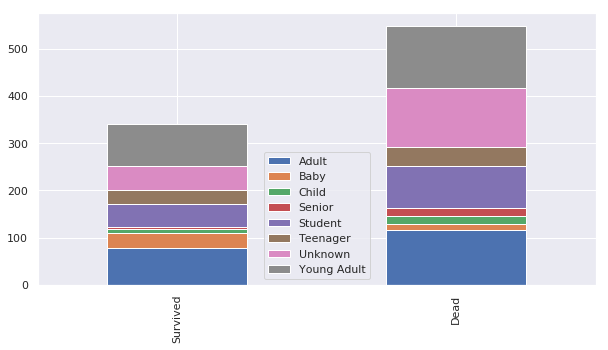

In [ ]:
bar_chart('AgeGroup')

In [ ]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult
5,0,3,0,-0.5,0,0,8.4583,3,1,Unknown
6,0,1,0,54.0,0,0,51.8625,1,1,Adult
7,0,3,0,2.0,3,1,21.0750,1,4,Baby
8,1,3,1,27.0,0,2,11.1333,1,3,Young Adult
9,1,2,1,14.0,1,0,30.0708,2,3,Teenager


In [ ]:
# 참고사이트(https://www.kaggle.com/michaelmmeskhi/titanic-survival/comments)
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,1,1,Student
1,1,1,1,38.0,1,0,71.2833,2,3,Adult
2,1,3,1,26.0,0,0,7.9250,1,2,Young Adult
3,1,1,1,35.0,1,0,53.1000,1,3,Young Adult
4,0,3,0,35.0,0,0,8.0500,1,1,Young Adult
5,0,3,0,-0.5,0,0,8.4583,3,1,Young Adult
6,0,1,0,54.0,0,0,51.8625,1,1,Adult
7,0,3,0,2.0,3,1,21.0750,1,4,Baby
8,1,3,1,27.0,0,2,11.1333,1,3,Young Adult
9,1,2,1,14.0,1,0,30.0708,2,3,Teenager


In [ ]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7} # 매핑
train['AgeGroup'] = train['AgeGroup'].map(age_mapping) # 매핑
test['AgeGroup'] = test['AgeGroup'].map(age_mapping) # 매핑
# 'Age' 삭제
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

In [ ]:
train.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4
1,1,1,1,1,0,71.2833,2,3,6
2,1,3,1,0,0,7.9250,1,2,5
3,1,1,1,1,0,53.1000,1,3,5
4,0,3,0,0,0,8.0500,1,1,5
5,0,3,0,0,0,8.4583,3,1,5
6,0,1,0,0,0,51.8625,1,1,6
7,0,3,0,3,1,21.0750,1,4,1
8,1,3,1,0,2,11.1333,1,3,5
9,1,2,1,1,0,30.0708,2,3,3


In [ ]:
####################
# Fare 범위 줄이기 #
####################

In [ ]:
test.describe()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,0.447368,0.392344,35.627188,1.464115,1.755981,4.696172
std,120.810458,0.841838,0.481622,0.896760,0.981429,55.907576,0.685516,1.058380,1.286728
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,996.250000,1.000000,0.000000,0.000000,0.000000,7.895800,1.000000,1.000000,4.000000
50%,1100.500000,3.000000,0.000000,0.000000,0.000000,14.454200,1.000000,1.000000,5.000000
75%,1204.750000,3.000000,1.000000,1.000000,0.000000,31.500000,2.000000,2.000000,6.000000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,512.329200,3.000000,6.000000,7.000000


In [ ]:
test = test.fillna({"Fare": 30.0})

In [ ]:
test.describe()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,0.447368,0.392344,35.613726,1.464115,1.755981,4.696172
std,120.810458,0.841838,0.481622,0.896760,0.981429,55.841179,0.685516,1.058380,1.286728
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,996.250000,1.000000,0.000000,0.000000,0.000000,7.895800,1.000000,1.000000,4.000000
50%,1100.500000,3.000000,0.000000,0.000000,0.000000,14.454200,1.000000,1.000000,5.000000
75%,1204.750000,3.000000,1.000000,1.000000,0.000000,31.471875,2.000000,2.000000,6.000000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,512.329200,3.000000,6.000000,7.000000


In [ ]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels=[1, 2, 3, 4])

train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4,1
1,1,1,1,1,0,2,3,6,4
2,1,3,1,0,0,1,2,5,2
3,1,1,1,1,0,1,3,5,4
4,0,3,0,0,0,1,1,5,2


In [ ]:
train.describe()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.523008,0.381594,1.361392,1.750842,4.636364
std,0.486592,0.836071,0.477990,1.102743,0.806057,0.635673,1.109047,1.353390
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,2.000000,6.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,3.000000,6.000000,7.000000


In [ ]:
#######################
#######################
#### 데이터 모델링 ####
#######################
#######################

In [ ]:
train_data = train.drop('Survived', axis=1) # X
target = train['Survived'] # Y

train_data.shape, target.shape

((891, 8), (891,))

In [ ]:
train.info() # null이 없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
AgeGroup    891 non-null int64
FareBand    891 non-null category
dtypes: category(1), int64(8)
memory usage: 56.8 KB


In [ ]:
# sklearn: 모델링 라이브러리

# K-fold 교차 검증
from sklearn.neighbors import KNeighborsClassifier
# 랜덤포레스트 알고리즘
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = RandomForestClassifier(n_estimators=13) #13개의 decision tree 사용
clf # 랜덤 포레스트 자세한 설명(https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
train.head(50)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,0,3,0,1,0,1,1,4,1
1,1,1,1,1,0,2,3,6,4
2,1,3,1,0,0,1,2,5,2
3,1,1,1,1,0,1,3,5,4
4,0,3,0,0,0,1,1,5,2
5,0,3,0,0,0,3,1,5,2
6,0,1,0,0,0,1,1,6,4
7,0,3,0,3,1,1,4,1,3
8,1,3,1,0,2,1,3,5,2
9,1,2,1,1,0,2,3,3,3


In [ ]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.82022472 0.75280899 0.79775281 0.82022472 0.84269663
 0.82022472 0.83146067 0.80898876 0.76404494]


In [ ]:
# decision tree Score
round(np.mean(score)*100, 2)

80.81

In [ ]:
clf = RandomForestClassifier()
clf.fit(train_data, target)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [ ]:
test_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,3,0,0,0,3,1,5,1
1,3,1,1,0,1,3,6,1
2,2,0,0,0,3,1,7,2
3,3,0,0,0,1,1,5,2
4,3,1,1,1,1,3,4,2


In [ ]:
submission = pd.DataFrame({

        "PassengerId": test["PassengerId"],

        "Survived": prediction

    })

In [ ]:
submission.to_csv('submission.csv', index=False)

from google.colab import files
files.download('submission.csv')

In [ ]:
submissionsubmissi = pd.read_csv('submission.csv')

submission.head(500)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
